<center style><h3>Computer Assignment 4</h3></center>
<center style><h4>Machine Learning</h4></center>
 <h4 style="text-align:right">
        محمد پویا افشاری - 810198577
</h4>


Project-point: in this project we are going to predict house prices based on Linear regression and use scikit learn to model based on Logistic Regression, K-Nearest-Neighbor, Decision Tree. Then we will apply the random forest and check results.


In [23]:
import pandas as pd
import math
import seaborn as sns


In [24]:
DATASET_PATH = 'house_data.csv'


## Checking the Dataset


In [25]:
dataset = pd.read_csv(DATASET_PATH)
display(dataset)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,style,house_age
0,0,0,0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650,...,1955.0,0,98178,47.5112,-122.257,1340,5650,Suburban,Contemporary,67
1,1,1,1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242,...,NaN,1991,98125,47.7210,-122.319,1690,7639,Suburban,Ranch,71
2,2,2,2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000,...,1933.0,0,98028,47.7379,-122.233,2720,8062,Rural,Victorian,89
3,3,3,3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000,...,1965.0,0,98136,47.5208,-122.393,1360,5000,Urban,Colonial,57
4,4,4,4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080,...,1987.0,0,98074,47.6168,-122.045,1800,7503,Suburban,Cape Cod,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,21608,21608,263000018,20140521T000000,360000.0,3,2.50,1530.0,1131,...,2009.0,0,98103,47.6993,-122.346,1530,1509,Suburban,Victorian,13
21609,21609,21609,21609,6600060120,20150223T000000,400000.0,4,2.50,2310.0,5813,...,2014.0,0,98146,47.5107,-122.362,1830,7200,Suburban,Cape Cod,8
21610,21610,21610,21610,1523300141,20140623T000000,402101.0,2,0.75,1020.0,1350,...,NaN,0,98144,47.5944,-122.299,1020,2007,Suburban,Ranch,13
21611,21611,21611,21611,291310100,20150116T000000,400000.0,3,2.50,1600.0,2388,...,2004.0,0,98027,47.5345,-122.069,1410,1287,Rural,Contemporary,18


### 1- Info and Describe methods


In [26]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      21613 non-null  int64  
 1   Unnamed: 0.1    21613 non-null  int64  
 2   Unnamed: 0.1.1  21613 non-null  int64  
 3   id              21613 non-null  int64  
 4   date            21613 non-null  object 
 5   price           21613 non-null  float64
 6   bedrooms        21613 non-null  int64  
 7   bathrooms       21613 non-null  float64
 8   sqft_living     18528 non-null  float64
 9   sqft_lot        21613 non-null  int64  
 10  floors          18530 non-null  float64
 11  waterfront      21613 non-null  int64  
 12  view            21613 non-null  int64  
 13  condition       21613 non-null  int64  
 14  grade           21613 non-null  int64  
 15  sqft_above      21613 non-null  int64  
 16  sqft_basement   21184 non-null  float64
 17  yr_built        18531 non-null 

As the info() method shows, the dataset has 27 columns and 21613 rows.


In [27]:
dataset.describe()


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.00000,21613.00000,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,18528.000000,2.161300e+04,18530.000000,...,21613.000000,21184.000000,18531.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,10806.00000,4.580302e+09,5.401822e+05,3.367464,2.111900,2077.569031,1.510697e+04,1.492903,...,1788.390691,292.121082,1970.896714,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,50.994864
std,6239.28002,6239.28002,6239.28002,2.876566e+09,3.673622e+05,0.943028,0.780697,953.971679,4.142051e+04,0.538562,...,828.090978,442.637777,29.406420,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411
min,0.00000,0.00000,0.00000,1.000102e+06,7.500000e+04,-5.000000,-5.000000,-33323.000000,5.200000e+02,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5403.00000,5403.00000,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,25.000000
50%,10806.00000,10806.00000,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.618000e+03,1.500000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,47.000000
75%,16209.00000,16209.00000,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,...,2210.000000,560.000000,1996.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,71.000000
max,21612.00000,21612.00000,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


The `describe()` method shows the following statistics for each feature:

- count: Number of non-missing values
- mean: Mean of the values
- std: Standard deviation of the values
- min: Minimum value
- 25%: First quartile
- 50%: Second quartile (median)
- 75%: Third quartile
- max: Maximum value


### 2- Number of missing values and their percentage for each feature


In [28]:
# Calculate the number of missing values and their percentage for each feature
rowCount = dataset.shape[0]
for col in dataset.columns:
    nan = dataset[col].isna().sum()
    print(
        f'Number of NaN values in {col:30}-> {nan:3} ({nan / rowCount * 100:5.2f}%)')


Number of NaN values in Unnamed: 0                    ->   0 ( 0.00%)
Number of NaN values in Unnamed: 0.1                  ->   0 ( 0.00%)
Number of NaN values in Unnamed: 0.1.1                ->   0 ( 0.00%)
Number of NaN values in id                            ->   0 ( 0.00%)
Number of NaN values in date                          ->   0 ( 0.00%)
Number of NaN values in price                         ->   0 ( 0.00%)
Number of NaN values in bedrooms                      ->   0 ( 0.00%)
Number of NaN values in bathrooms                     ->   0 ( 0.00%)
Number of NaN values in sqft_living                   -> 3085 (14.27%)
Number of NaN values in sqft_lot                      ->   0 ( 0.00%)
Number of NaN values in floors                        -> 3083 (14.26%)
Number of NaN values in waterfront                    ->   0 ( 0.00%)
Number of NaN values in view                          ->   0 ( 0.00%)
Number of NaN values in condition                     ->   0 ( 0.00%)
Number of NaN valu

### 3- Plotting the relationship between the features and the target


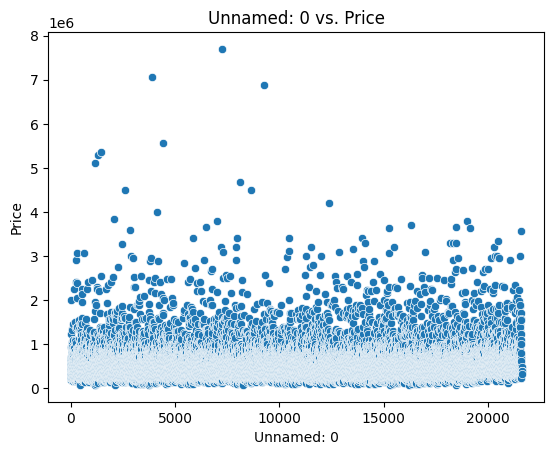

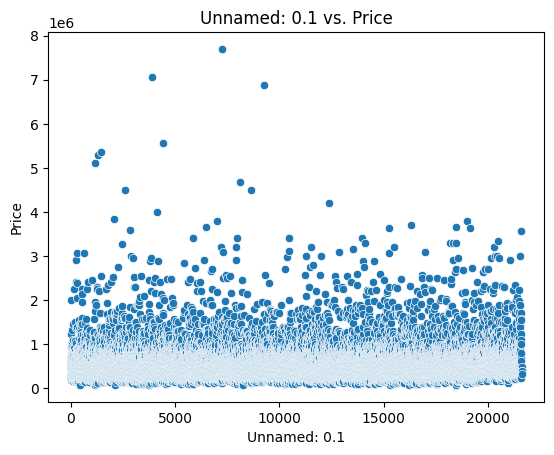

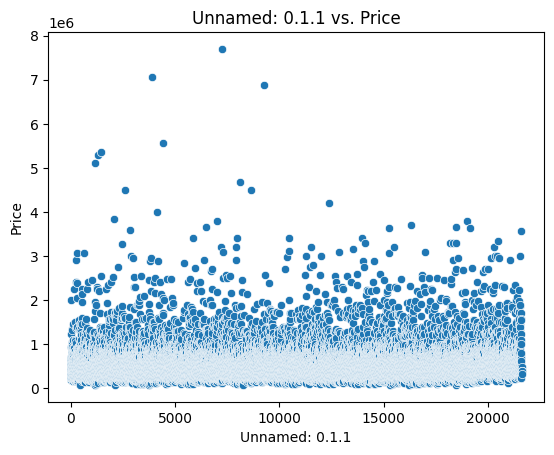

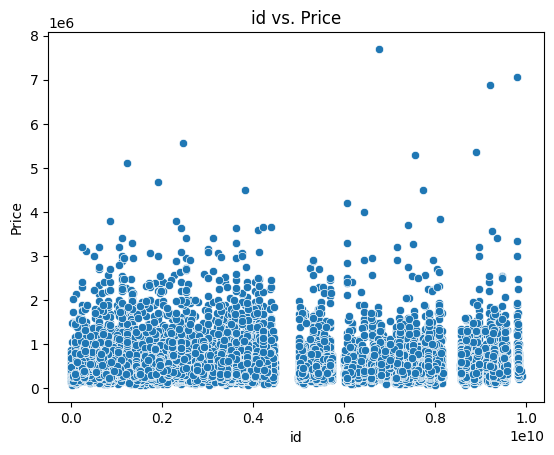

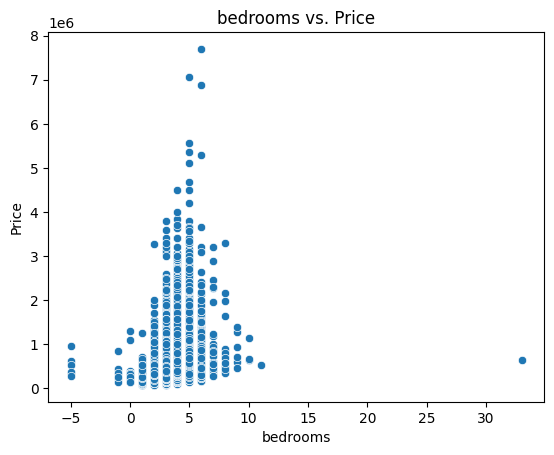

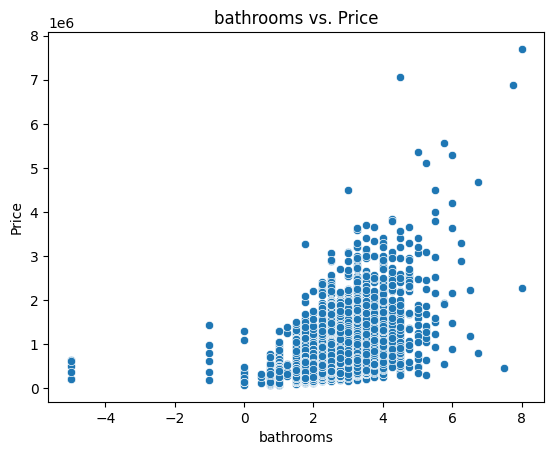

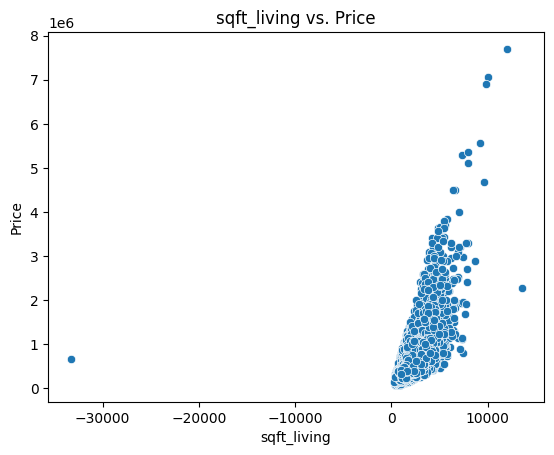

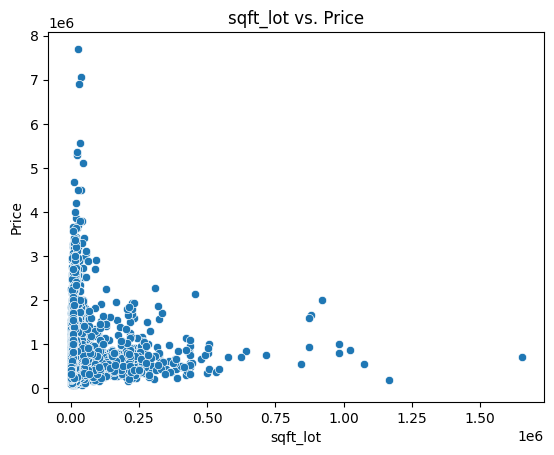

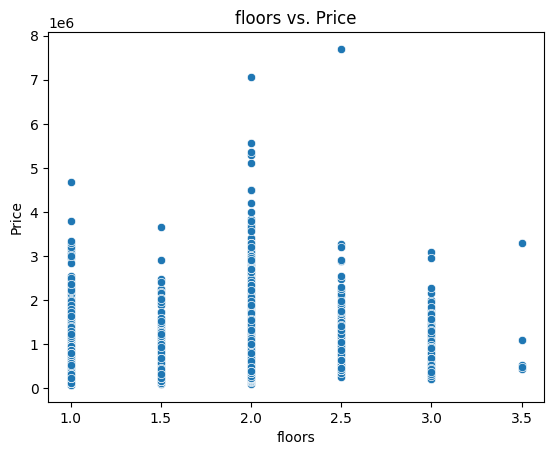

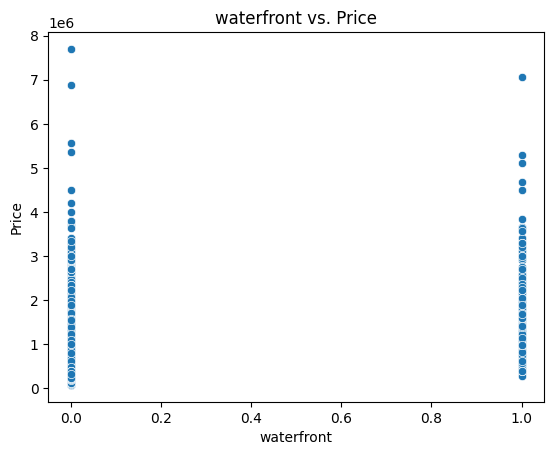

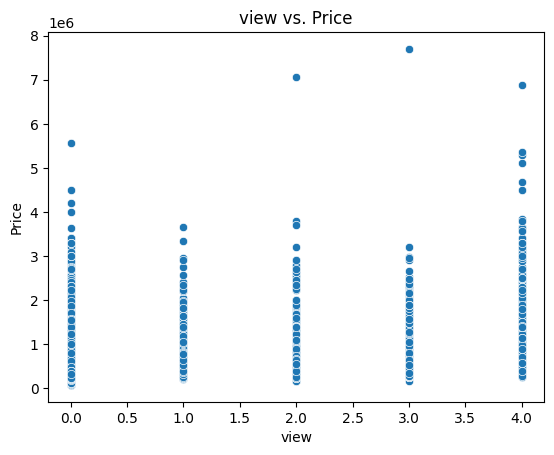

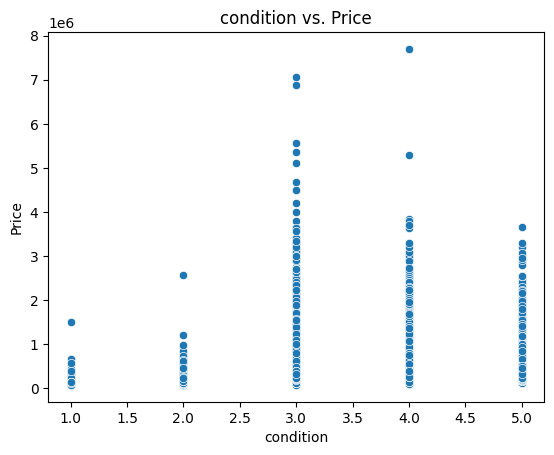

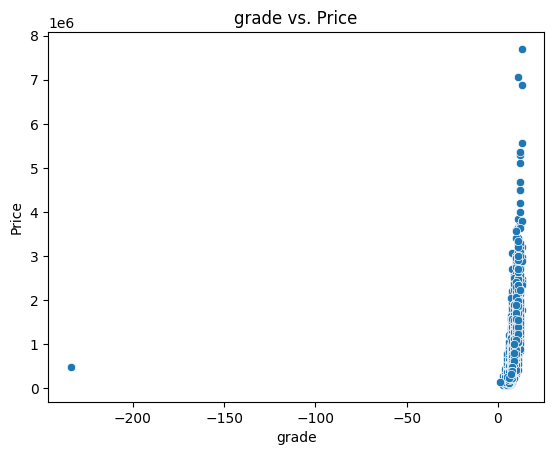

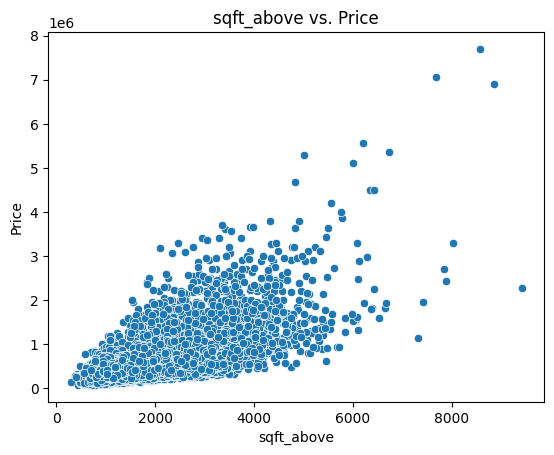

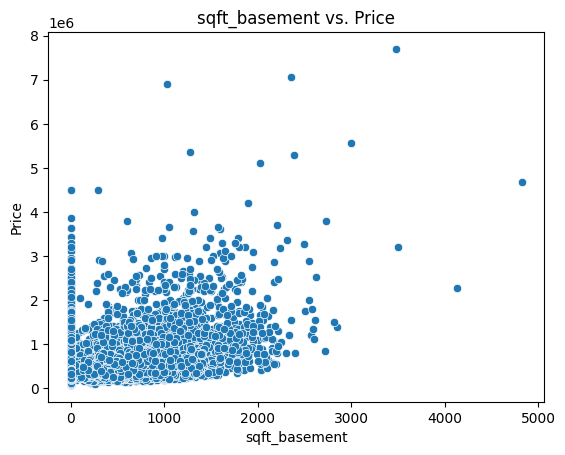

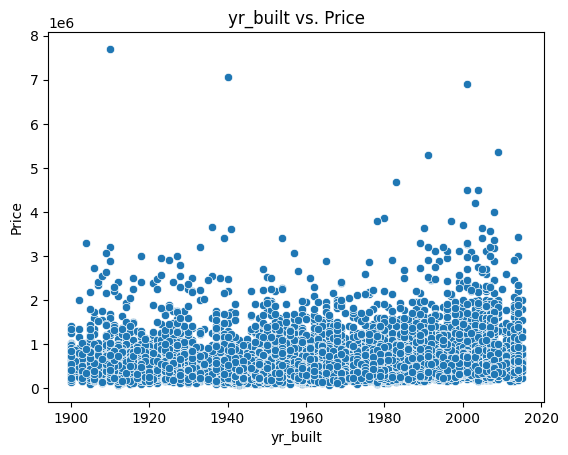

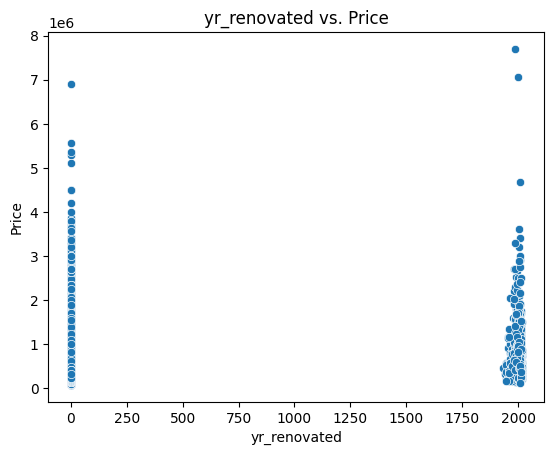

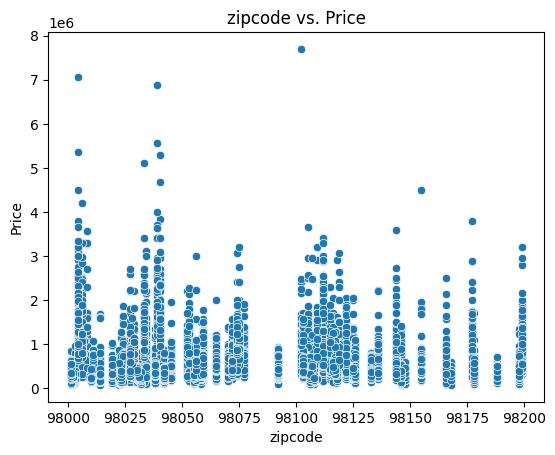

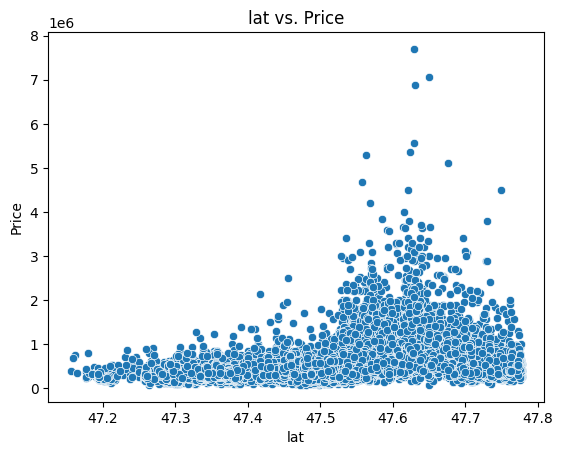

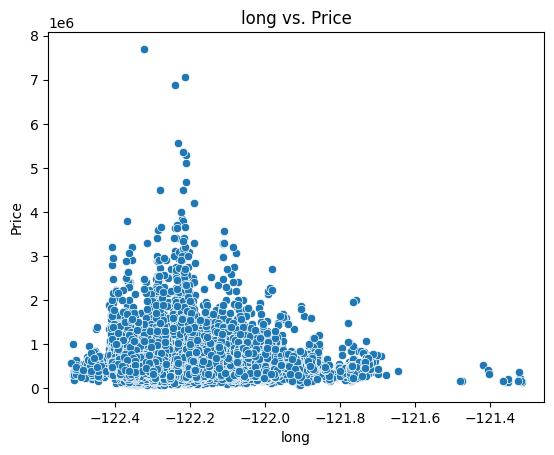

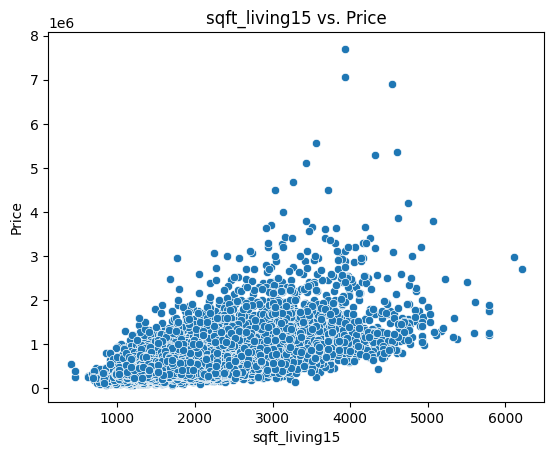

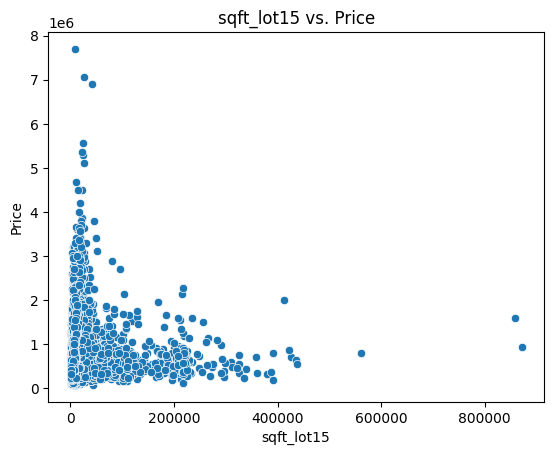

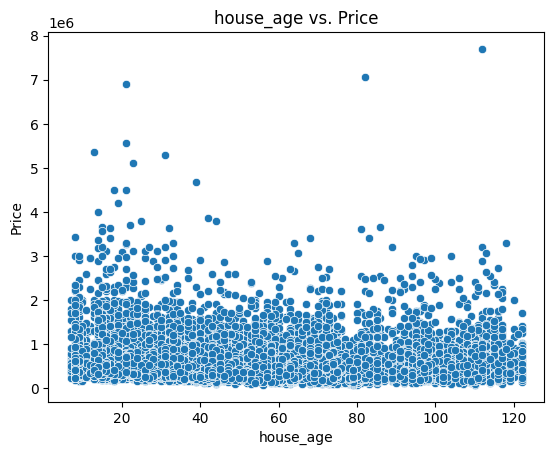

In [29]:
import matplotlib.pyplot as plt
dataset = dataset[dataset['price'] >= 0]
for col in dataset.columns:
    # exclude object-type columns and the target variable
    if dataset[col].dtype != 'object' and col != 'price':
        sns.scatterplot(x=col, y='price', data=dataset)
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.title(f'{col} vs. Price')
        plt.show()


<AxesSubplot:>

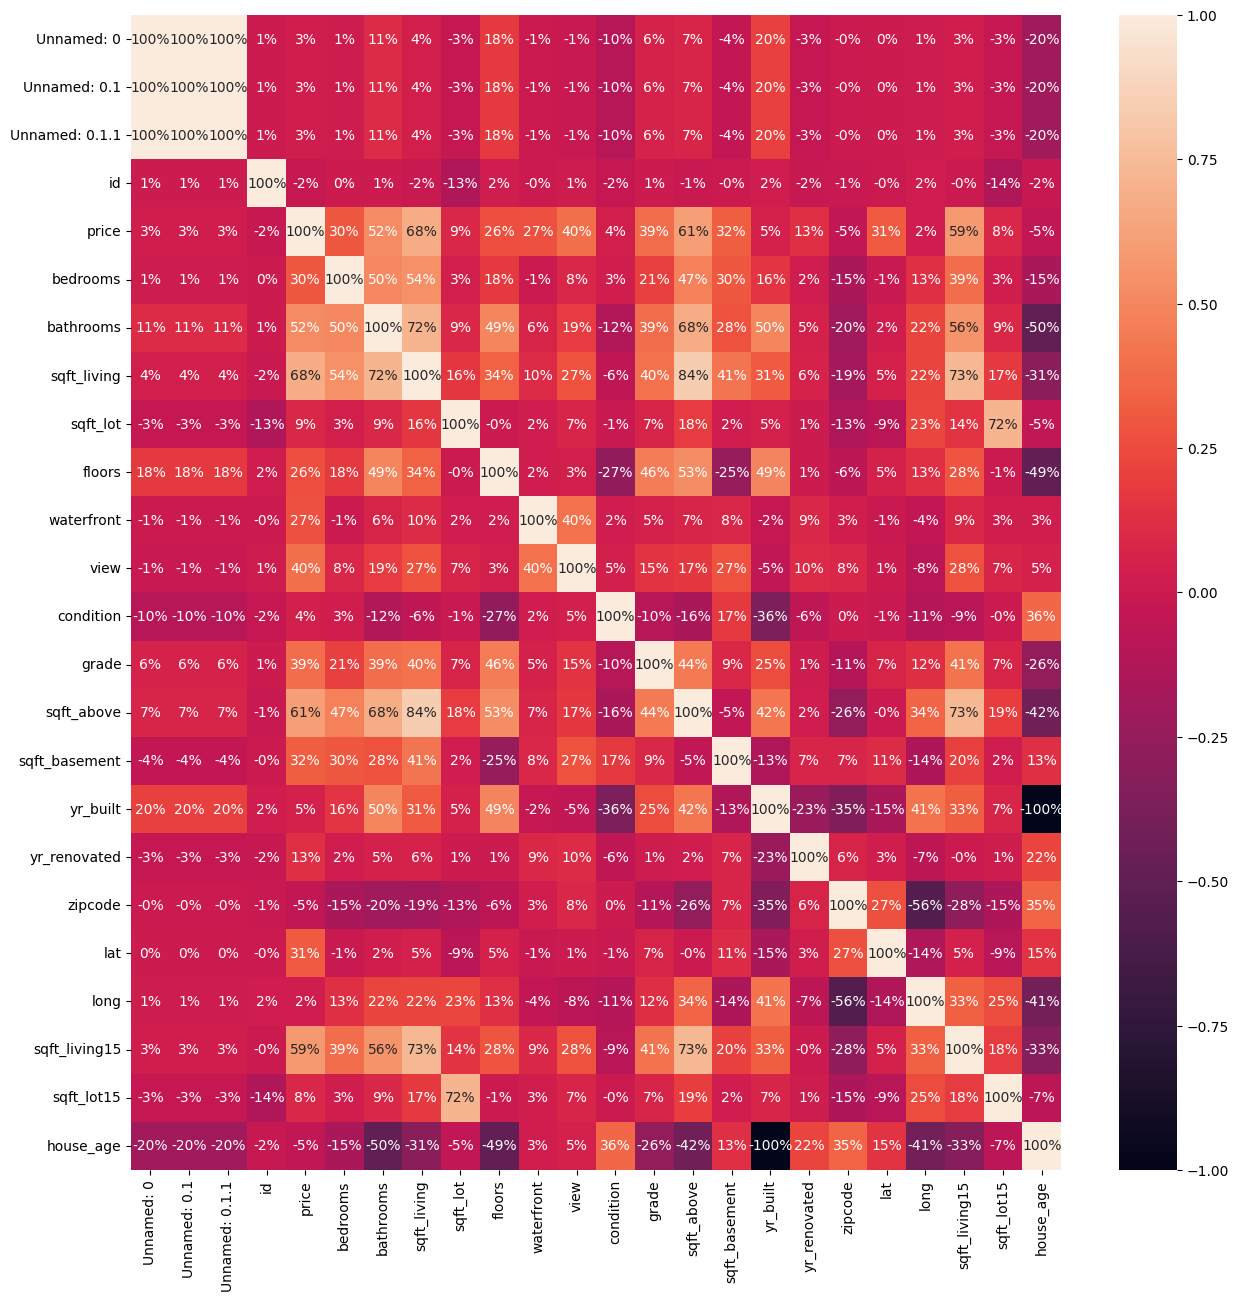

In [30]:
plt.figure(figsize=(15, 15))
sns.heatmap(dataset.corr(), annot=True, fmt='.0%')


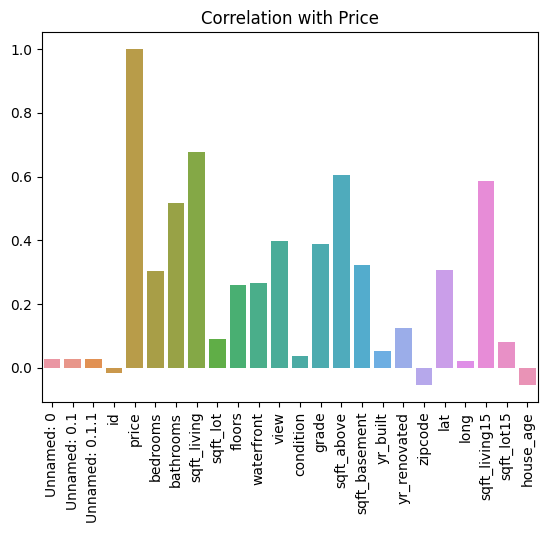

In [31]:

corr_matrix = dataset.corr()
price_corr = corr_matrix.loc['price', :]
sns.barplot(x=price_corr.index, y=price_corr.values)
plt.xticks(rotation=90)
plt.title('Correlation with Price')
plt.show()


The plot shows that the `sqft_lot` feature has the most effect on the target. (68%)


### 4- Plotting unique values for each feature


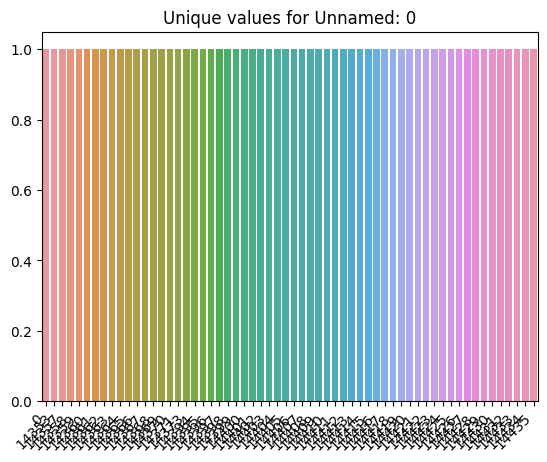

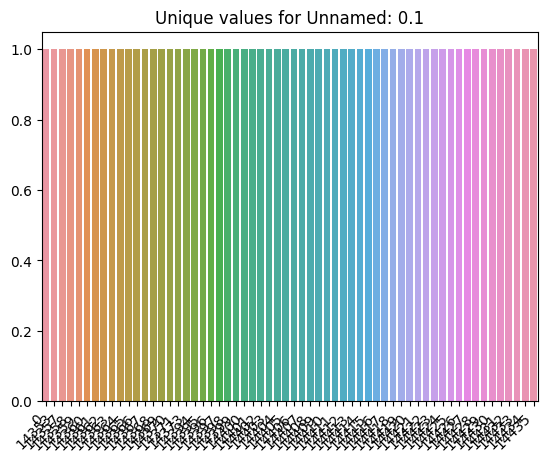

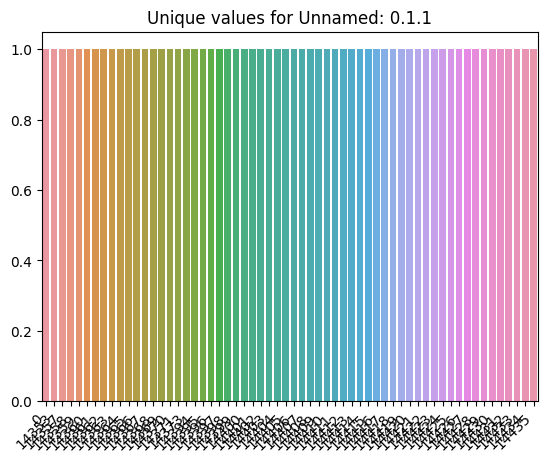

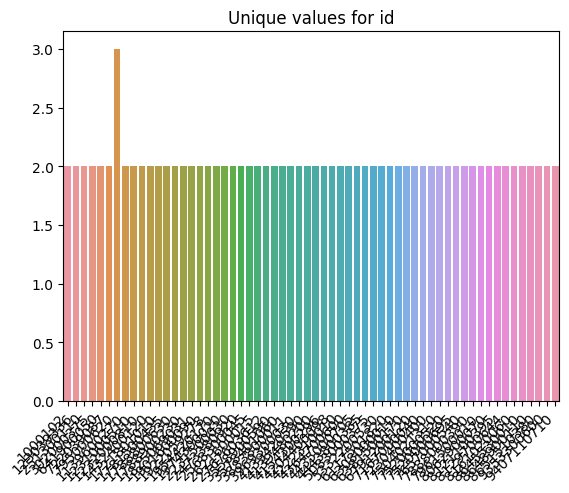

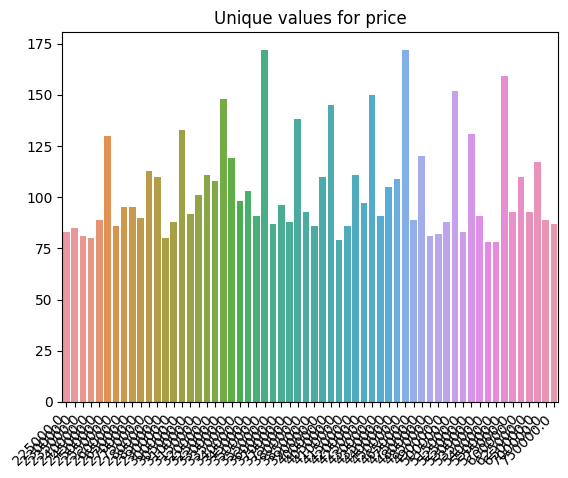

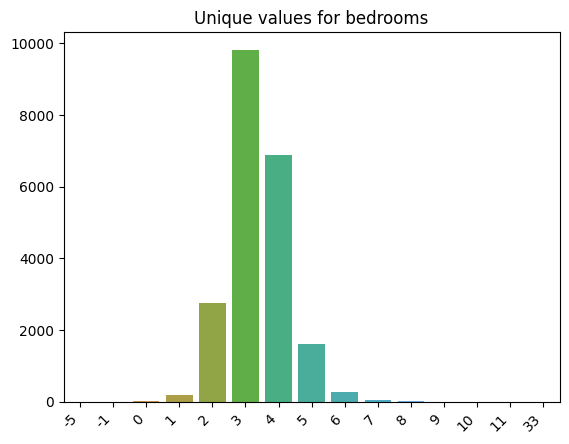

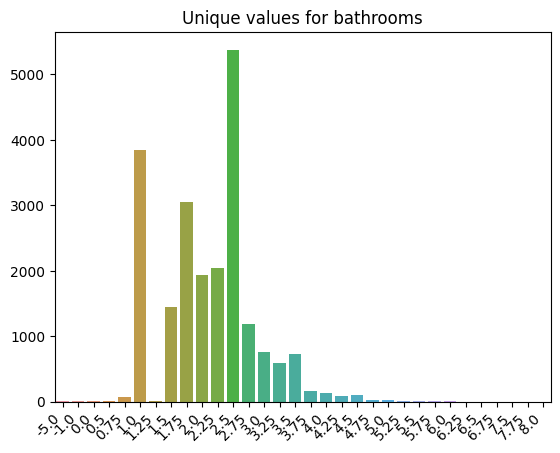

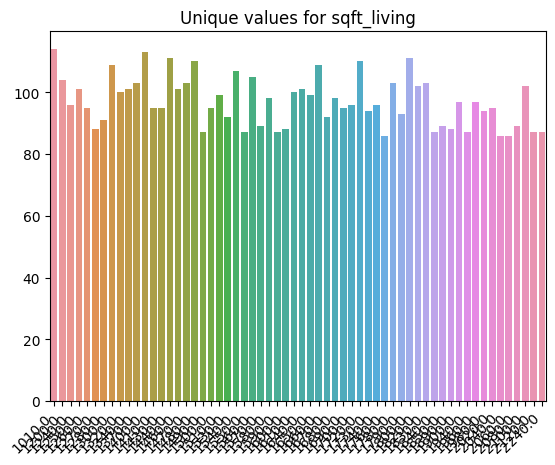

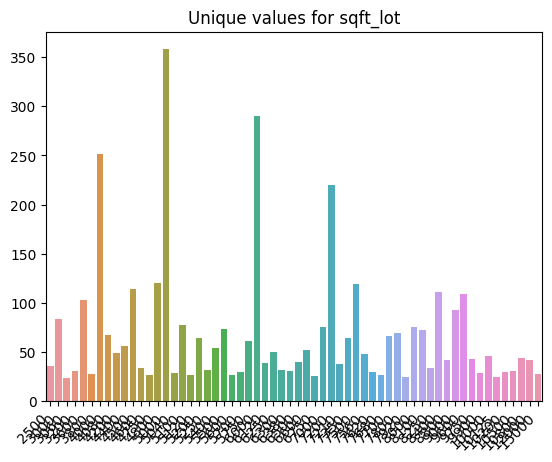

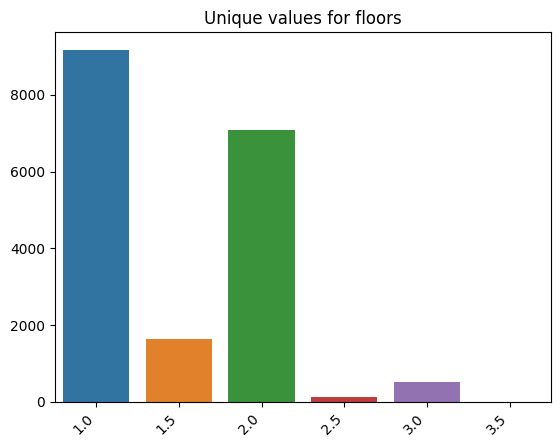

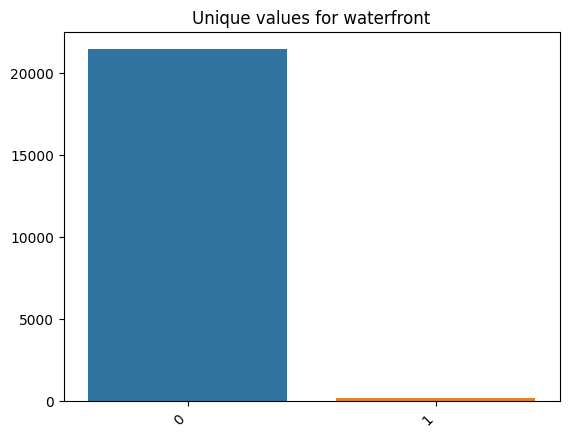

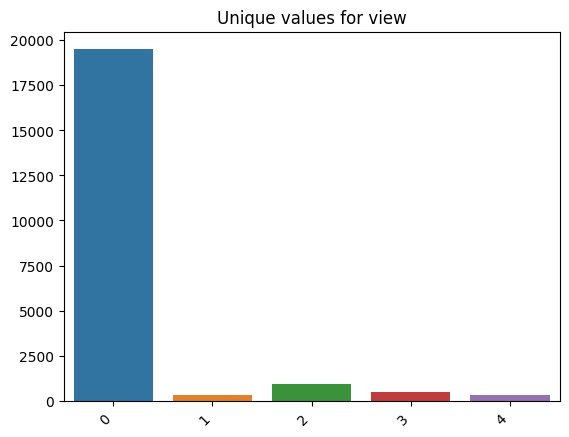

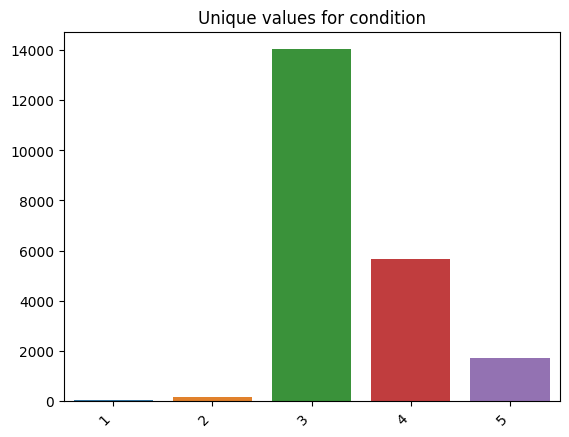

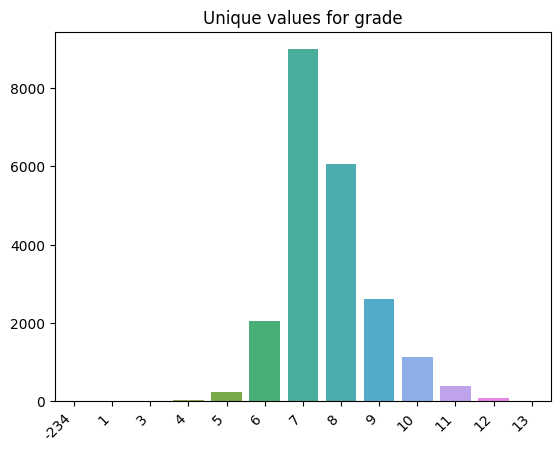

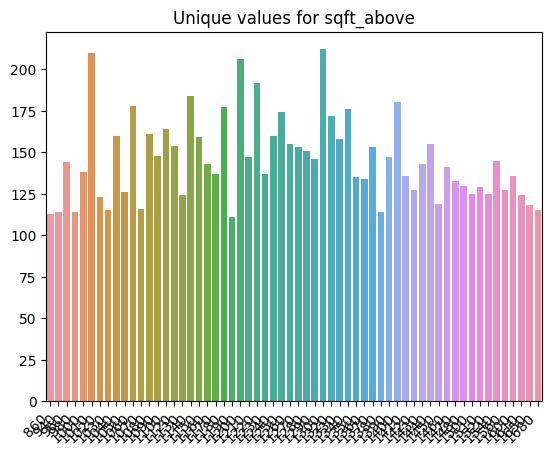

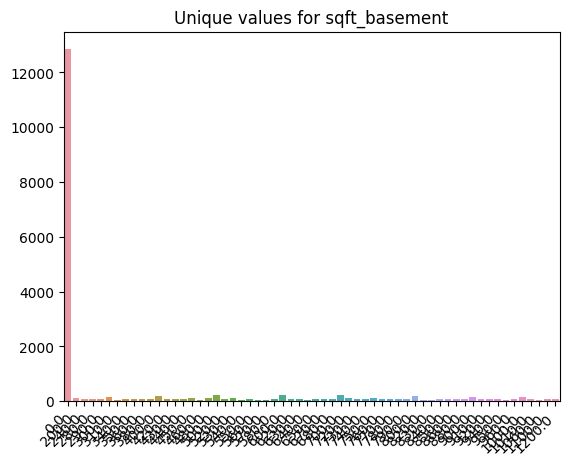

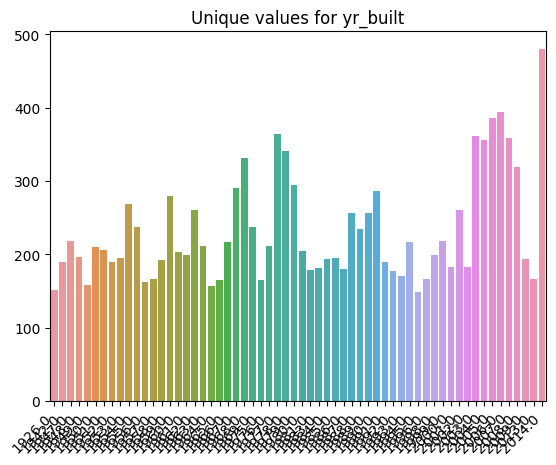

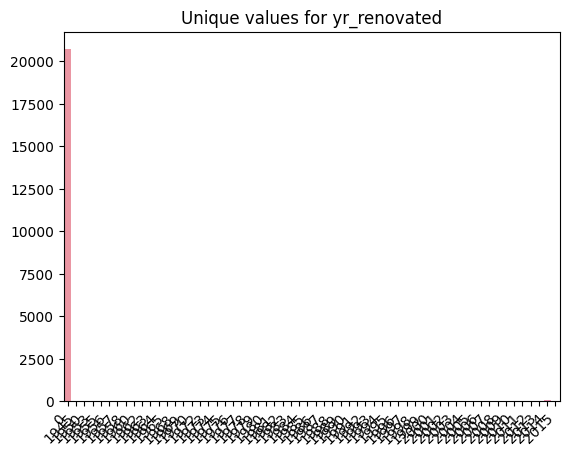

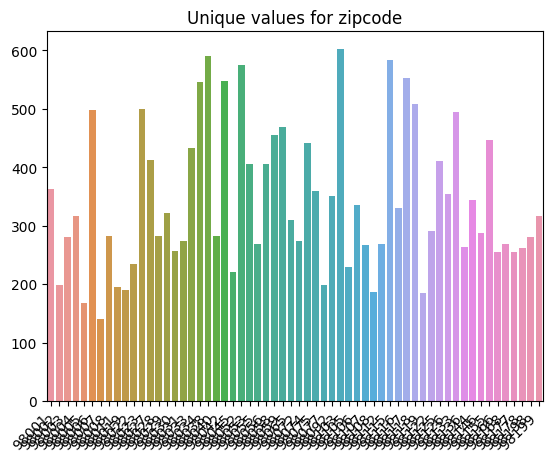

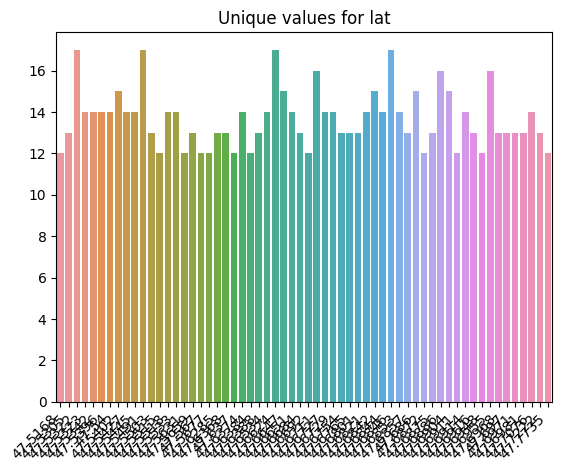

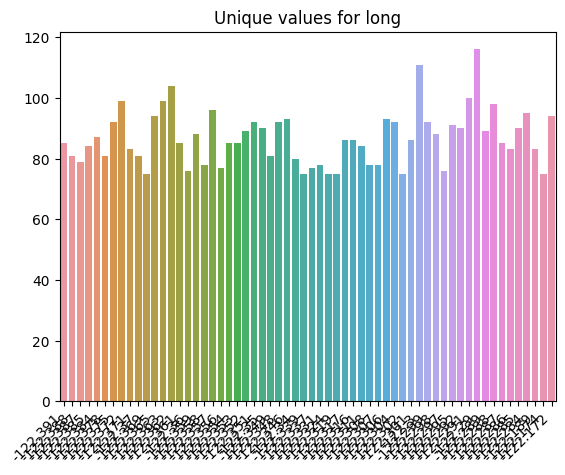

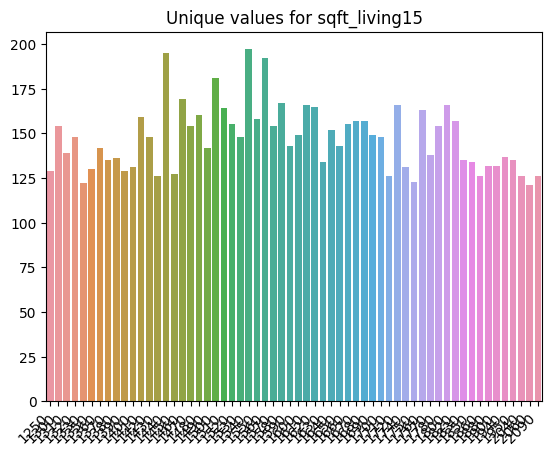

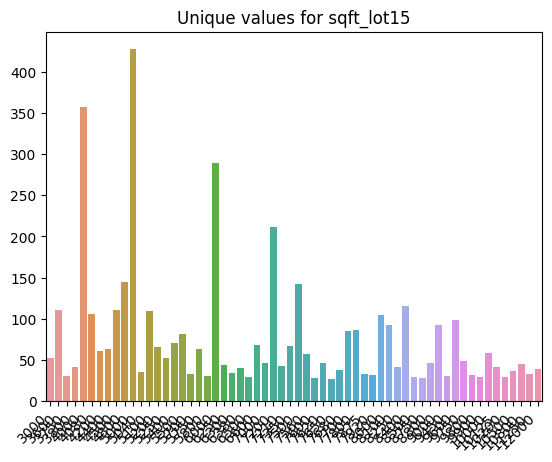

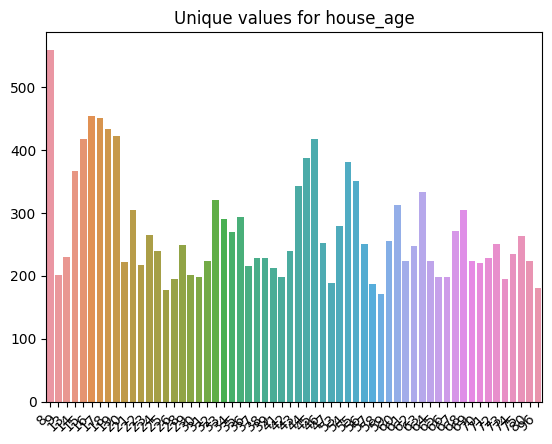

In [32]:

for col in dataset.columns:
    if dataset[col].dtype != 'object':  # Only consider non-object columns
        unique_values = dataset[col].value_counts().head(
            60)  # Limit to top 10 most frequent values
        if len(unique_values) > 90:  # Group the rest into an "other" category
            other_count = len(dataset[col]) - unique_values.sum()
            unique_values['Other'] = other_count
        plt.figure()
        ax = sns.barplot(x=unique_values.index, y=unique_values.values)
        ax.set(title=f'Unique values for {col}', xlabel=None, ylabel=None)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.show()


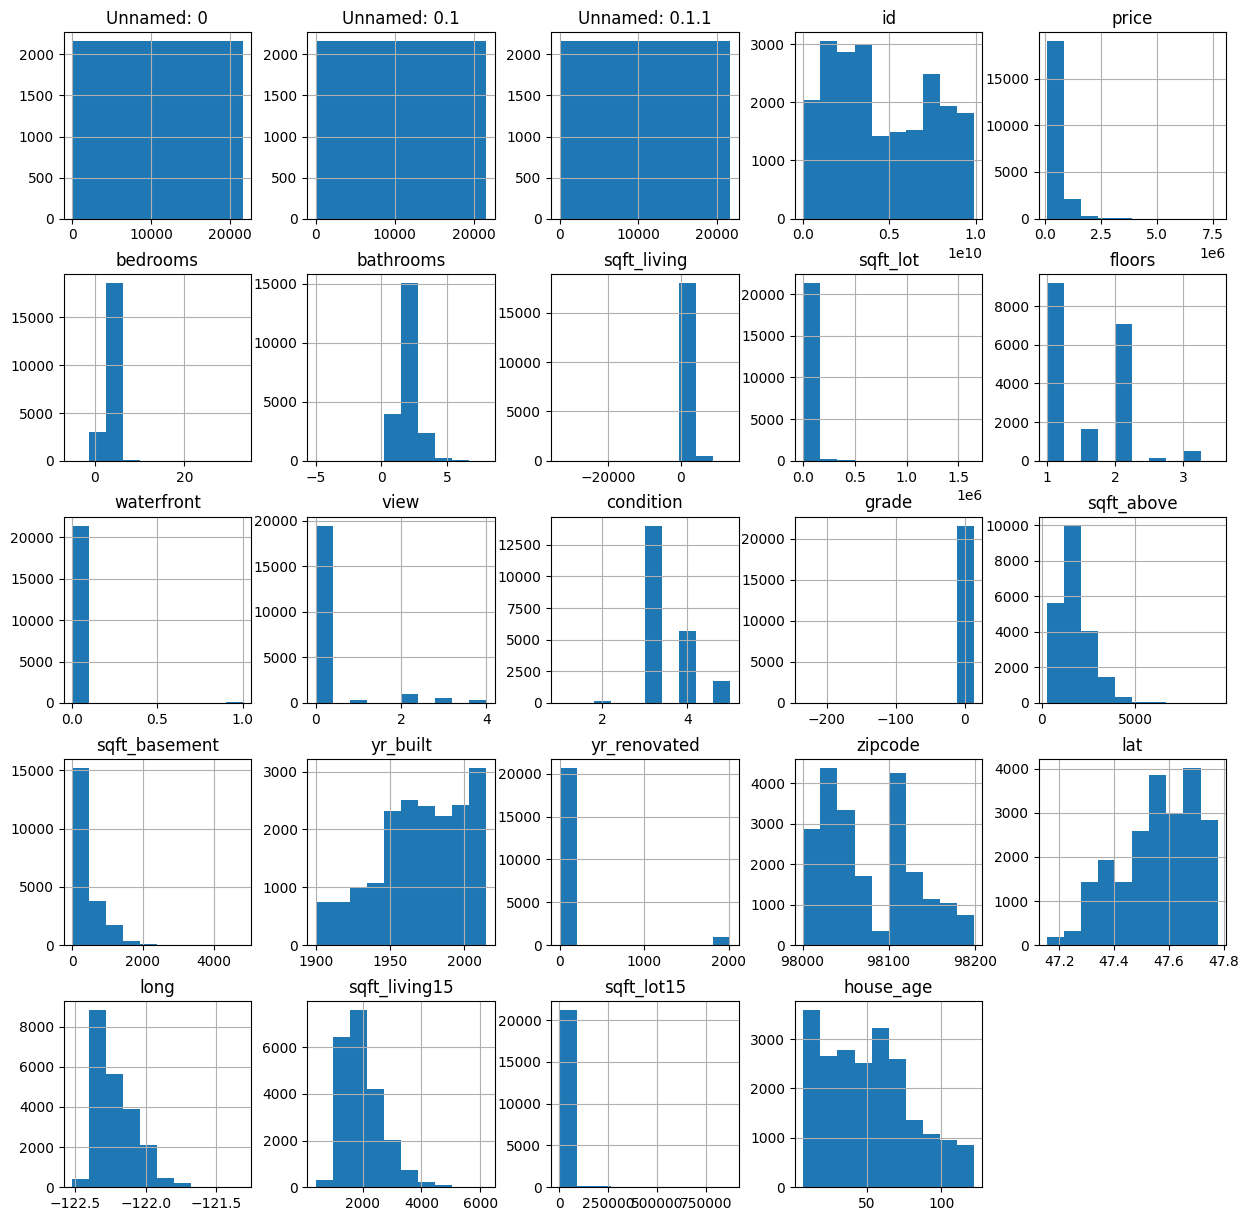

In [33]:
dataset.hist(figsize=(15, 15))
plt.show()


### 5- Plotting the relationship between the features using hexbin


   Unnamed: 0      price
0           0   221900.0
2           2   180000.0
3           3   604000.0
4           4   510000.0
5           5  1230000.0
   Unnamed: 0.1      price
0             0   221900.0
2             2   180000.0
3             3   604000.0
4             4   510000.0
5             5  1230000.0
   Unnamed: 0.1.1      price
0               0   221900.0
2               2   180000.0
3               3   604000.0
4               4   510000.0
5               5  1230000.0
           id      price
0  7129300520   221900.0
2  5631500400   180000.0
3  2487200875   604000.0
4  1954400510   510000.0
5  7237550310  1230000.0
       price      price
0   221900.0   221900.0
2   180000.0   180000.0
3   604000.0   604000.0
4   510000.0   510000.0
5  1230000.0  1230000.0
   bedrooms      price
0         3   221900.0
2         2   180000.0
3         4   604000.0
4         3   510000.0
5         4  1230000.0
   bathrooms      price
0        1.0   221900.0
2        1.0   180000.0
3        3

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


   sqft_living15      price
0           1340   221900.0
2           2720   180000.0
3           1360   604000.0
4           1800   510000.0
5           4760  1230000.0
   sqft_lot15      price
0        5650   221900.0
2        8062   180000.0
3        5000   604000.0
4        7503   510000.0
5      101930  1230000.0
   house_age      price
0         67   221900.0
2         89   180000.0
3         57   604000.0
4         35   510000.0
5         21  1230000.0


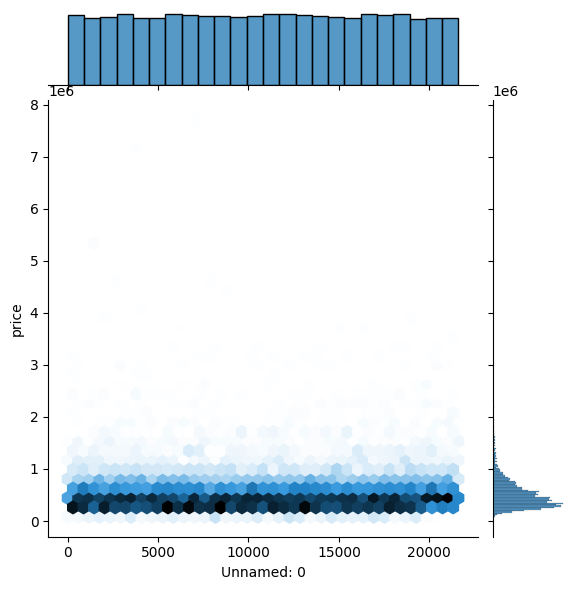

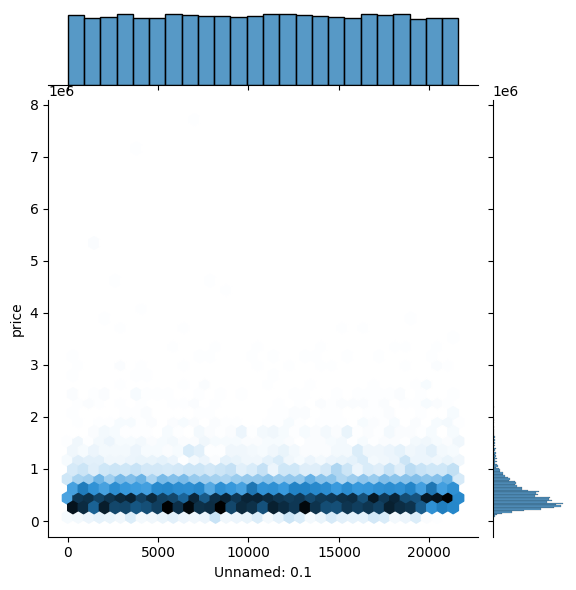

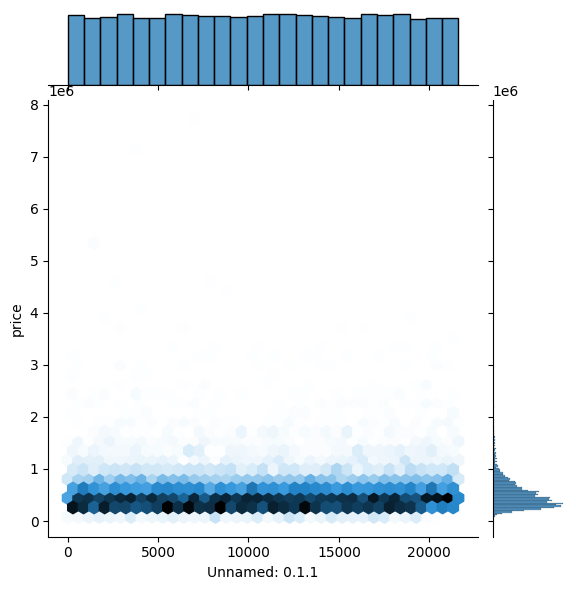

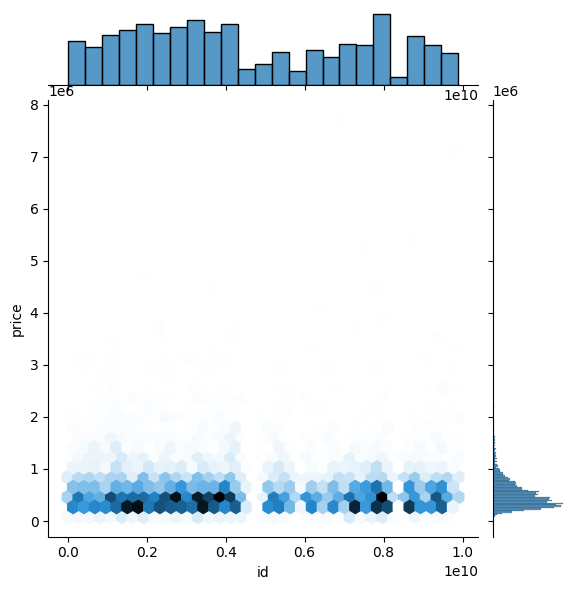

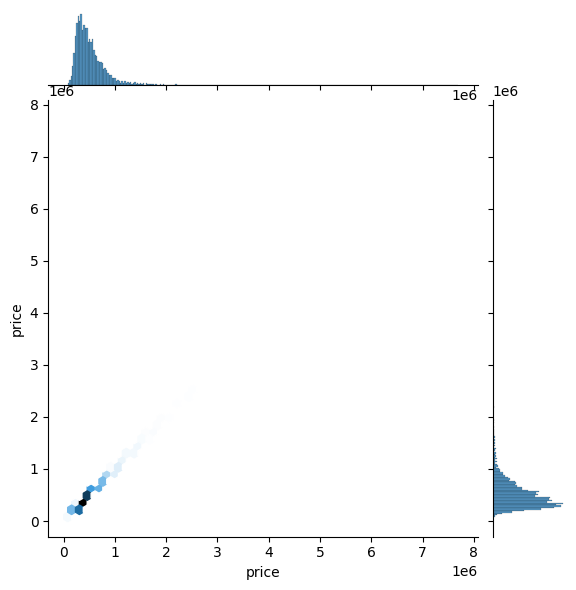

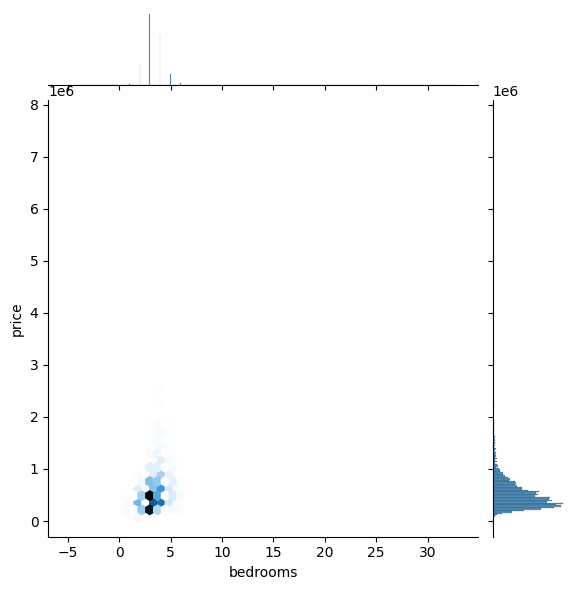

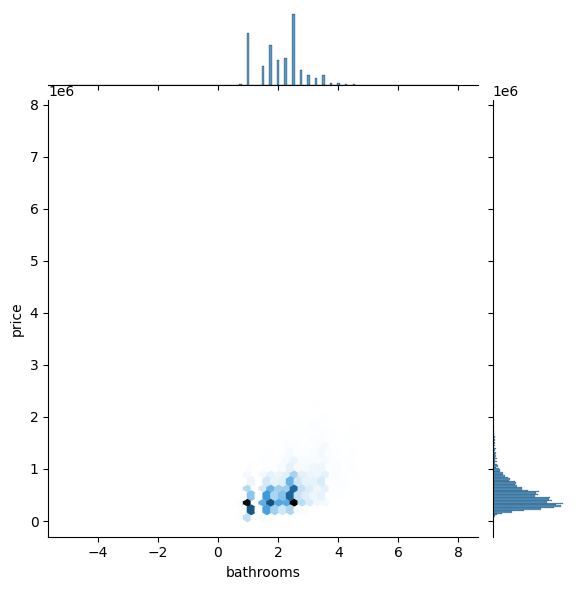

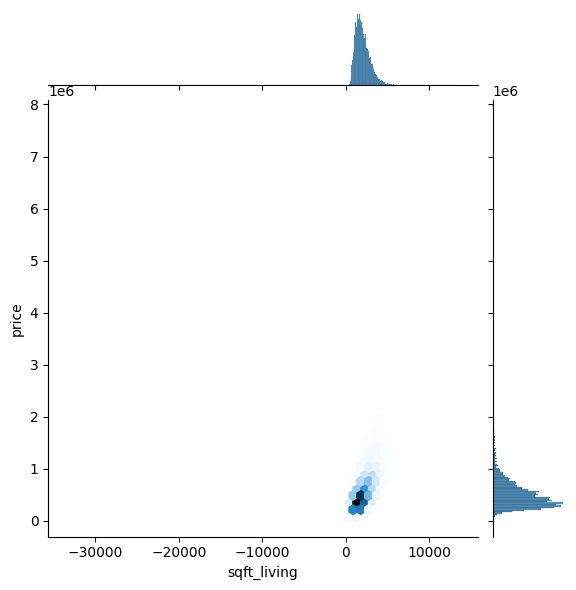

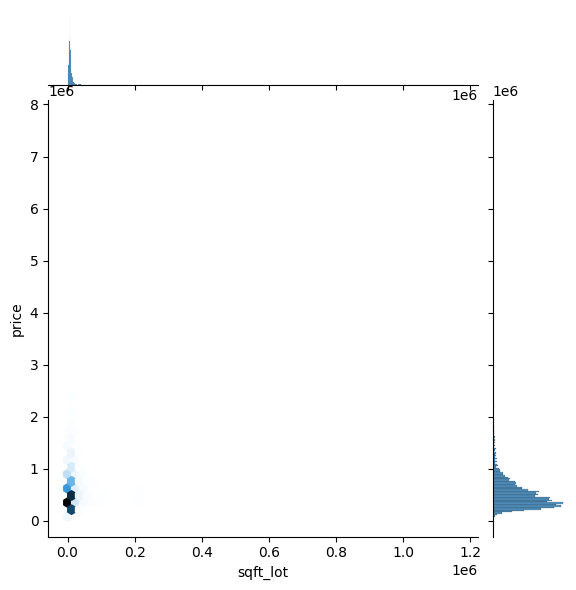

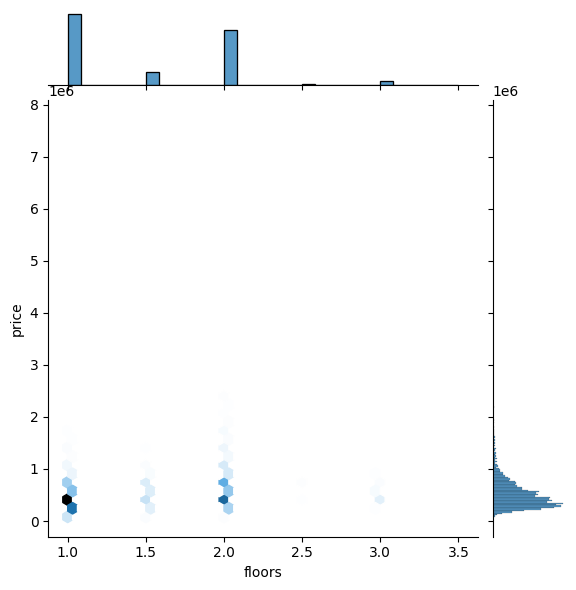

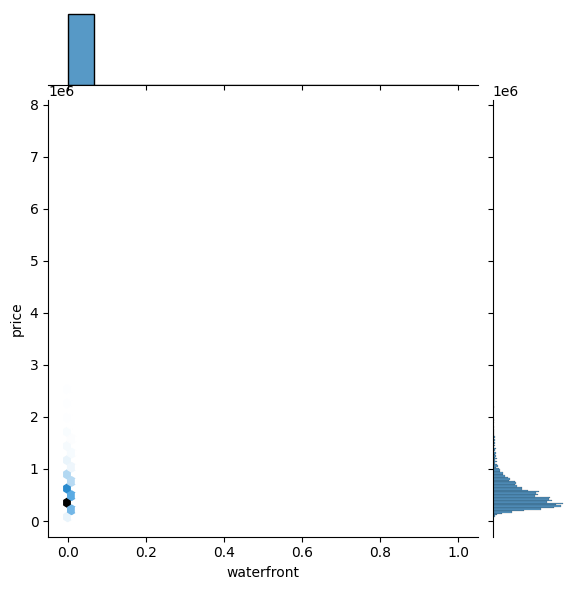

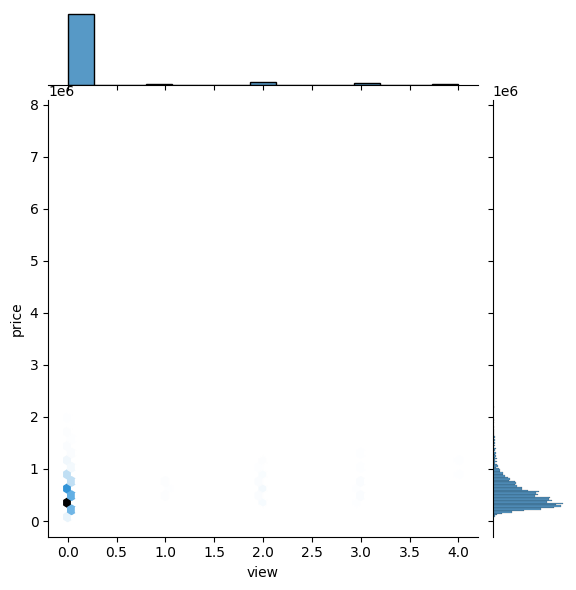

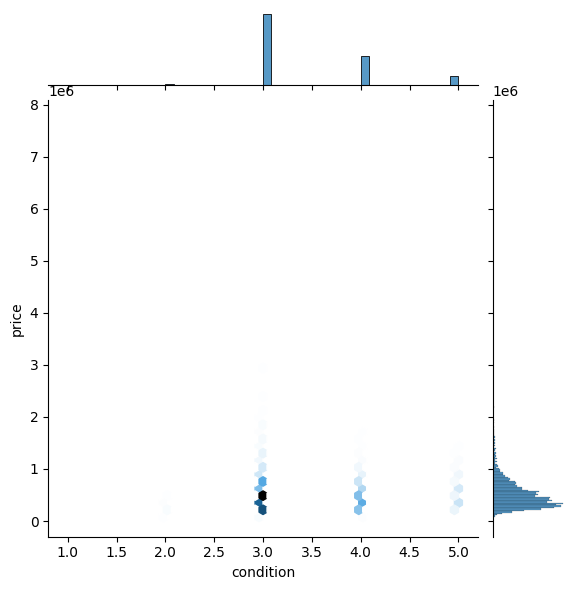

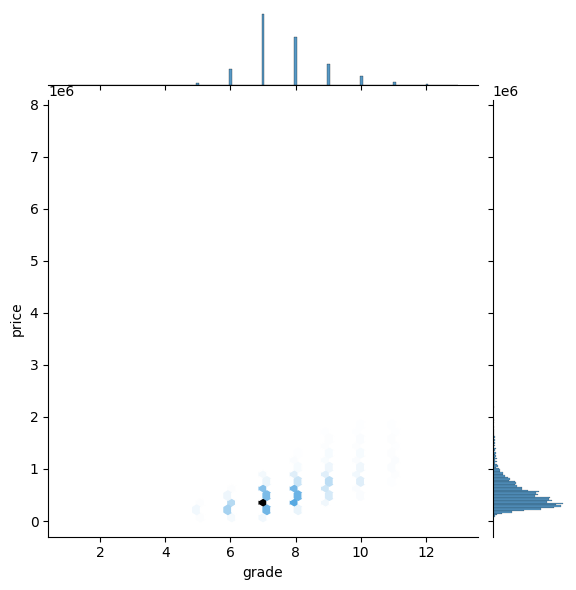

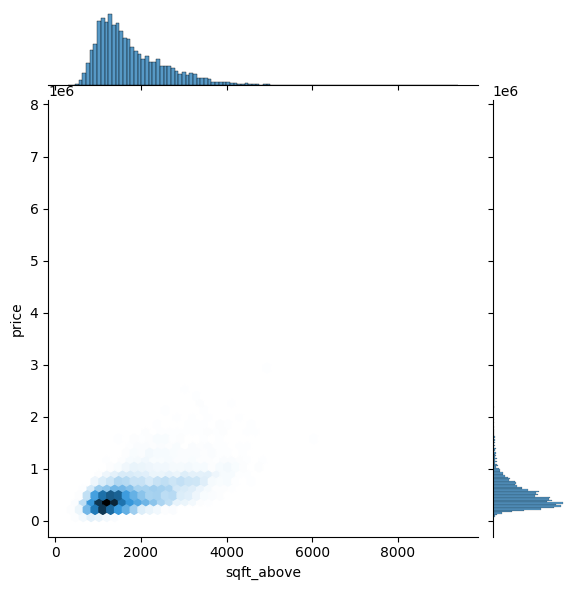

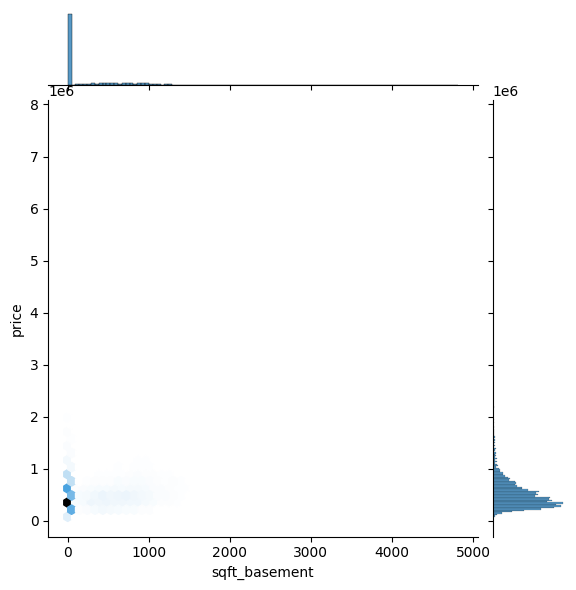

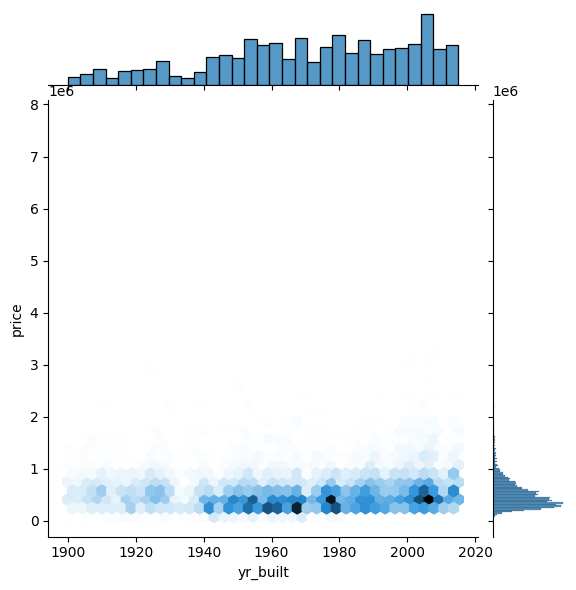

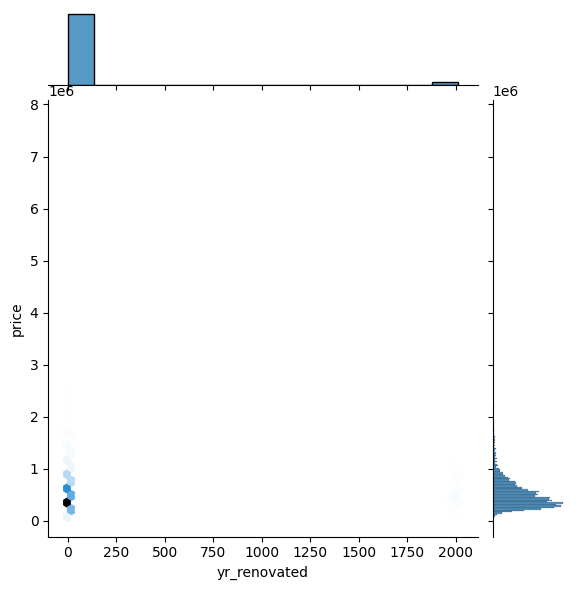

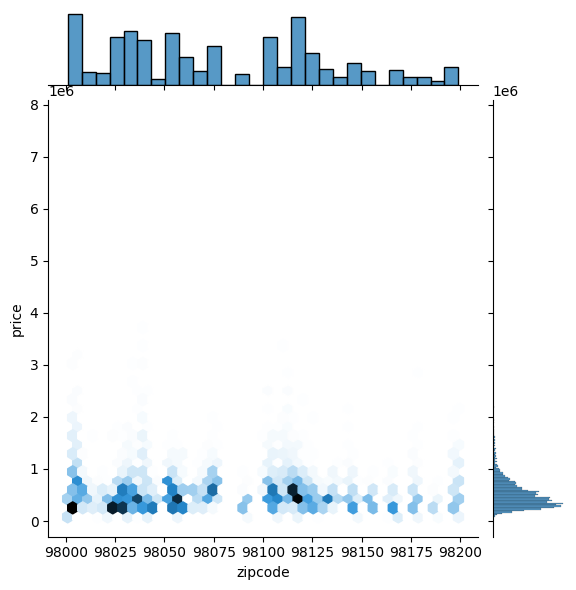

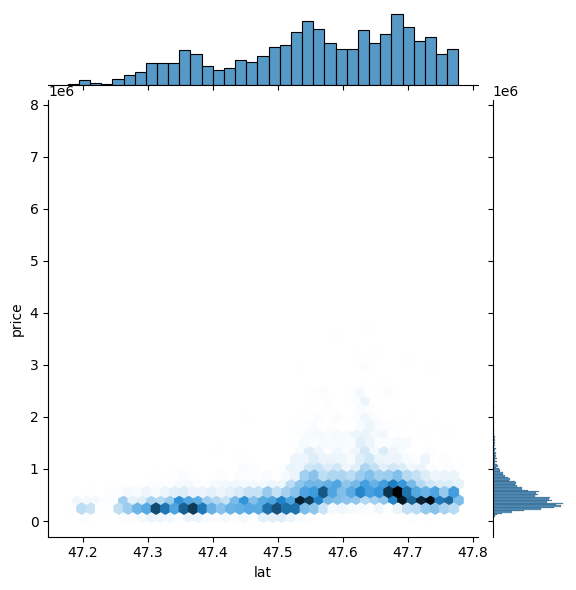

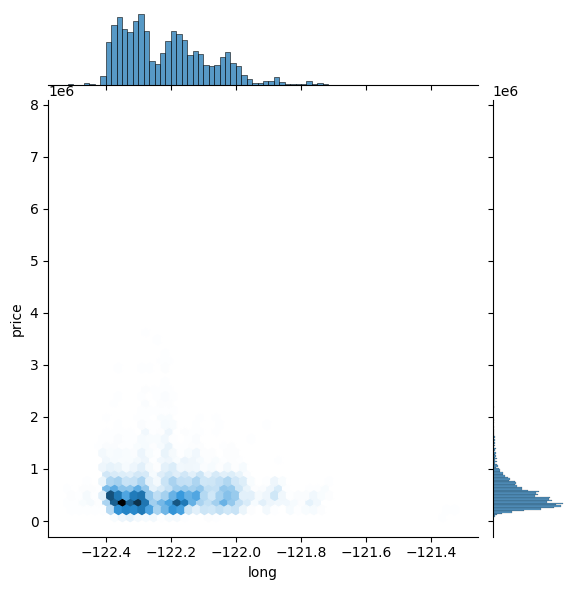

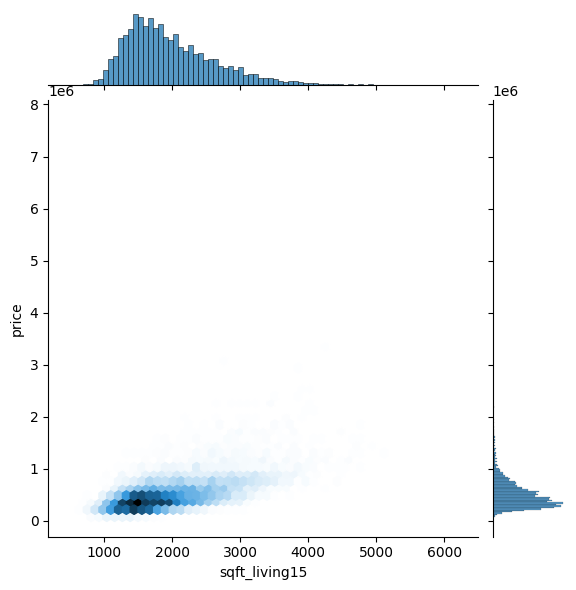

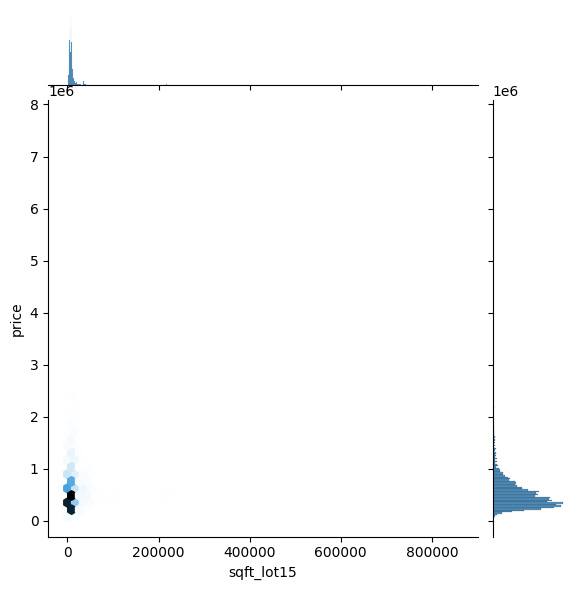

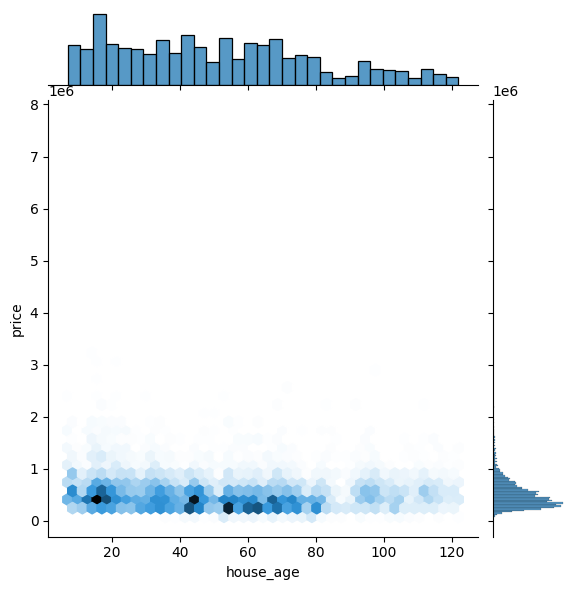

In [35]:
dataset.dropna(inplace=True)
numerical_cols = dataset.select_dtypes(include=['float', 'int']).columns

for col in numerical_cols:
    # Add this line to check the data being passed
    print(dataset[[col, 'price']].head())
    sns.jointplot(x=col, y='price', data=dataset, kind='hex')


### 6- Relationship between the features


I have used also `heatmap` plot which is the most notable plot to see correlation between target and features.
